**LOADING DATA SET THROUGH PANDAS**

In [1]:
import pandas as pd

cancer_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
print(cancer_set.shape)

(569, 32)


In [2]:
#selecting features from data set
cancer_features = cancer_set.iloc[:,2:]

print(cancer_features.shape)
print(type(cancer_features))

(569, 30)
<class 'pandas.core.frame.DataFrame'>


In [3]:
#converting dataframe to numpy array
cancer_features = cancer_features.values

print(cancer_features.shape)
print(type(cancer_features))


(569, 30)
<class 'numpy.ndarray'>


In [4]:
cancer_features_names = ['mean radius', 
'mean texture', 'mean perimeter', 
'mean area', 'mean smoothness', 
'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry',
'mean fractal dimension','radius error',
'texture error','perimeter error',
'area error', 'smoothness error',
'compactness error','concavity error',
'concave points error','symmetry error',
'fractal dimension error','worst radius',
'worst texture', 'worst perimeter', 
'worst area','worst smoothness', 
'worst compactness', 'worst concavity',
'worst concave points','worst symmetry',
'worst fractal dimension']

In [5]:
#selecting target from data set
cancer_target = cancer_set.iloc[:, 1]

# Replacing 'M' with 0 and 'B' with 1
cancer_target = cancer_target.replace(['M', 'B'], [0, 1])

# Converting to numpy array
cancer_target = cancer_target.values

print(cancer_target.shape)
print(type(cancer_target))

(569,)
<class 'numpy.ndarray'>


**LOADING SAME DATA SET THROUGH SKLEARN**

In [6]:
#directly importing data set from sklearn

import sklearn.datasets as datasets

breast_cancer = datasets.load_breast_cancer()

print(breast_cancer.data.shape)
print(breast_cancer.target.shape)

(569, 30)
(569,)


**STANDARDIZATION**

In [7]:
#preprocessing
# Standardization or Mean Removal is the process of transforming each feature vector into a normal distribution with mean 0 and variance 1.
# This can be achieved using StandardScaler

import sklearn.preprocessing as preprocessing


standardizer = preprocessing.StandardScaler()
standardizer = standardizer.fit(breast_cancer.data)
breast_cancer_standardized = standardizer.transform(breast_cancer.data)

print('Mean of each feature after Standardization :\n')
print(breast_cancer_standardized.mean(axis=0))
print('\n\nStd. of each feature after Standardization :\n')
print(breast_cancer_standardized.std(axis=0))

Mean of each feature after Standardization :

[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]


Std. of each feature after Standardization :

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


**SCALING**

In [8]:
#scaling
# Scaling transforms existing data values to lie between a minimum and maximum value.
# MinMaxScaler transforms data to range 0 and 1.
# MaxAbsScaler transforms data to range -1 and 1.

min_max_scaler = preprocessing.MinMaxScaler().fit(breast_cancer.data)

breast_cancer_minmaxscaled = min_max_scaler.transform(breast_cancer.data)

# By default, transformation occurs to a range of 0 and 1. It can also be customized with feature_range argument.

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 10)).fit(breast_cancer.data)

breast_cancer_minmaxscaled10 = min_max_scaler.transform(breast_cancer.data)

print(breast_cancer_minmaxscaled)
print(breast_cancer_minmaxscaled10)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]
[[5.21037437 0.22658099 5.45988529 ... 9.12027491 5.98462448 4.18863964]
 [6.43144493 2.72573554 6.15783291 ... 6.39175258 2.33589592 2.22878132]
 [6.01495575 3.90260399 5.95743211 ... 8.35051546 4.03705894 2.13433032]
 ...
 [4.55251077 6.21237741 4.45788128 ... 4.87285223 1.28720678 1.51908697]
 [6.44564343 6.63510315 6.65537972 ... 9.10652921 4.97141731 4.52315361]
 [0.36868759 5.01521813 0.28539838 ... 0.         2.57441356 1.00682146]]


In [9]:
# Using MaxAbsScaler, the maximum absolute value of each feature is scaled to unit size, i.e., 1. It is intended for data that is previously centered at sparse or zero data.

max_abs_scaler = preprocessing.MaxAbsScaler().fit(breast_cancer.data)

breast_cancer_maxabsscaled = max_abs_scaler.transform(breast_cancer.data)
print(breast_cancer_maxabsscaled)

[[0.63998577 0.26425662 0.65145889 ... 0.91202749 0.69313046 0.57301205]
 [0.73176805 0.45239308 0.70503979 ... 0.63917526 0.41428141 0.42901205]
 [0.70046247 0.54098778 0.68965517 ... 0.83505155 0.54429045 0.42207229]
 ...
 [0.59053718 0.71486762 0.57453581 ... 0.48728522 0.33413679 0.37686747]
 [0.73283529 0.74669043 0.74323607 ... 0.91065292 0.6156975  0.59759036]
 [0.27605834 0.62474542 0.25421751 ... 0.         0.43250979 0.33922892]]


**NORMALIZATION**

In [10]:
# Normalization scales each sample to have a unit norm.
# Normalization can be achieved with 'l1', 'l2', and 'max' norms.
# 'l1' norm makes the sum of absolute values of each row as 1, and 'l2' norm makes the sum of squares of each row as 1.
# 'l1' norm is insensitive to outliers.
# By default l2 norm is considered. Hence, removing outliers is recommended before applying l2 norm.

normalizer = preprocessing.Normalizer(norm='l1').fit(breast_cancer.data)

breast_cancer_normalized = normalizer.transform(breast_cancer.data)
print(breast_cancer_normalized)

[[5.04461573e-03 2.91067878e-03 3.44346198e-02 ... 7.44214015e-05
  1.29017660e-04 3.33410122e-05]
 [5.49864230e-03 4.75016401e-03 3.55259874e-02 ... 4.97203436e-05
  7.35112606e-05 2.37962634e-05]
 [5.81273050e-03 6.27326171e-03 3.83776011e-02 ... 7.17365928e-05
  1.06660210e-04 2.58546946e-05]
 ...
 [7.00344278e-03 1.18467875e-02 4.56911357e-02 ... 5.98245895e-05
  9.35761210e-05 3.29921220e-05]
 [5.68390968e-03 8.09267334e-03 3.86561042e-02 ... 7.31182555e-05
  1.12767664e-04 3.42138252e-05]
 [1.18802525e-02 3.75697675e-02 7.33636209e-02 ... 0.00000000e+00
  4.39538722e-04 1.07764300e-04]]


**BINARIZATON**

In [11]:
# Binarization is the process of transforming data points to 0 or 1 based on a given threshold.
# Any value above the threshold is transformed to 1, and any value below the threshold is transformed to 0.
# By default, a threshold of 0 is used.

binarizer = preprocessing.Binarizer(threshold=3.0).fit(breast_cancer.data)
breast_cancer_binarized = binarizer.transform(breast_cancer.data)
print(breast_cancer_binarized[:5,:5])

[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]]


**ONE HOT ENCODING**

In [12]:
# OneHotEncoder converts categorical integer values into one-hot vectors. In an one-hot vector, every category is transformed into a binary attribute having only 0 and 1 values.

onehotencoder = preprocessing.OneHotEncoder()
onehotencoder = onehotencoder.fit([[1], [1], [1], [2], [2], [1]])

# Transforming category values 1 and 2 to one-hot vectors
print(onehotencoder.transform([[1]]).toarray())
print(onehotencoder.transform([[2]]).toarray())

[[1. 0.]]
[[0. 1.]]


**LABEL ENCODING**

In [13]:
# Label Encoding is a step in which, in which categorical features are represented as categorical integers. 

labels = ['malignant', 'benign', 'malignant', 'benign']

labelencoder = preprocessing.LabelEncoder()

labelencoder = labelencoder.fit(labels)

bc_labelencoded = labelencoder.transform(breast_cancer.target_names)
print(bc_labelencoded)

[1 0]


**IMPUTATION**

In [14]:
# Imputation replaces missing values with either median, mean, or the most common value of the column or row in which the missing values exist.

from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(breast_cancer.data)
breast_cancer_imputed = imputer.transform(breast_cancer.data)
print(breast_cancer_imputed)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


**EXERCISE**

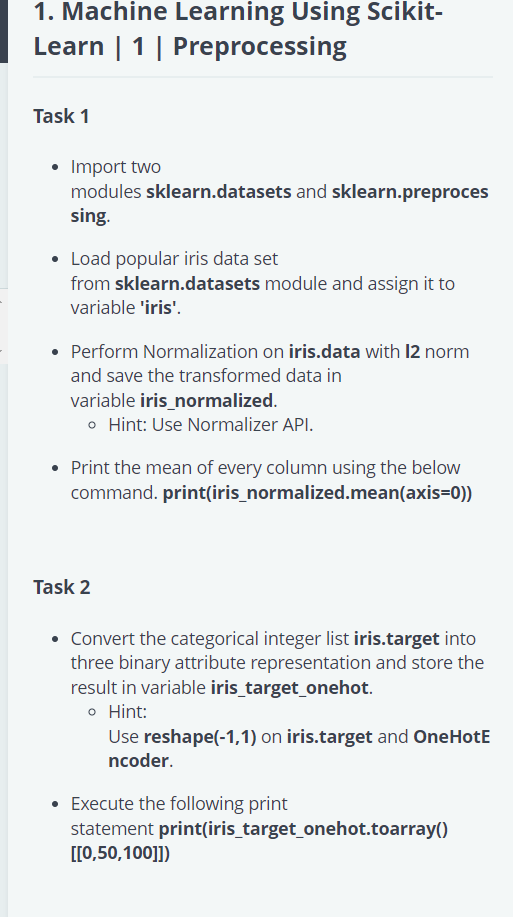

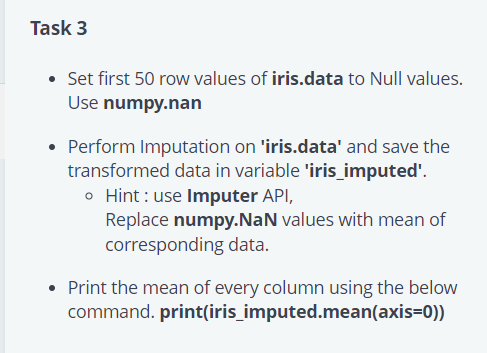

In [15]:
#Write your code here

import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

#TASK 1 - NORMALIZATION
iris = datasets.load_iris()

iris_normalizer = preprocessing.Normalizer(norm='l2').fit(iris.data)
iris_normalized = iris_normalizer.transform(iris.data)

print(iris_normalized.mean(axis=0))

#TASK 2 - ONE HOT ENCODING

onehotencoder = preprocessing.OneHotEncoder()
iris_target_onehot = onehotencoder.fit_transform(iris.target.reshape(-1,1))
# iris_target_onehot = iris_target_onehot.transform([[1]])
print(iris_target_onehot.toarray()[[0, 50, 100]])

#TASK 3 - IMPUTATION

iris.data[:50] = np.nan

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(iris.data)
iris_imputed = imputer.transform(iris.data)

print(iris_imputed.mean(axis=0))


[0.75140029 0.40517418 0.45478362 0.14107142]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[6.262 2.872 4.906 1.676]
